<a href="https://colab.research.google.com/github/cornpip/lab/blob/main/hsi-%3Esound(test).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def RGB_To_HSI(rgb):
    b = rgb[0]
    g = rgb[1]
    r = rgb[2]
    
    I = np.mean(rgb)
    
    #그레이스케일인 경우
    if (r==g==b):
        H=0
        S=0
    #컬러인 경우
    else:
        min_rgb = min(rgb)
        S=1-(min_rgb / I) # I에 /3 있으니까 3 날린거네
        
        temp = ((r-g) + (r-b)) / (2*np.sqrt( (r-g)*(r-g) + (r-b)*(g-b)))
        H = np.arccos(temp) * 180 / np.pi ##radian에서 degree로 바꾸려고 np.arccos 은 return이 radian이네

        if b > g:
            H = 360 - H
        #H /= 360  #degree를 그냥 표현하면 안되고 180도면 1/2 이렇게 표현해야하나봐?
    
    print(H, S, I);
    return np.array([H, S, I], dtype=np.float32)

img = cv2.imread('/dog.PNG')
print(img.shape) # img.shape color로 하면 b g r 이라는 듯?
test=img.astype(np.float)
#print(test)
b,g,r = cv2.split(test)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)
#print(h, s, v)    
print(h)
h = cv2.inRange(h, 15, 20)
orange = cv2.bitwise_and(hsv, hsv, mask = h)
orange = cv2.cvtColor(orange, cv2.COLOR_HSV2BGR)

cv2_imshow(orange)

cv2_imshow(hsv)
cv2_imshow(img)
cv2_imshow(h)
cv2_imshow(s)
cv2_imshow(v)


AttributeError: ignored

(402, 611, 3)
[[100 100 100 ...  18  18  19]
 [ 96  96  96 ...  19  19  19]
 [ 90  83  83 ...  19  19  19]
 ...
 [ 30  30  30 ...  31  31  31]
 [ 31  30  29 ...  29  30  30]
 [ 31  30  29 ...  27  28  28]]
ssssssssssssssssssssssssss
[[  7   7   7 ... 196 196 198]
 [  6   6   6 ... 196 196 198]
 [  5   5   5 ... 196 196 198]
 ...
 [162 178 176 ... 226 175 113]
 [170 175 174 ... 181 145 102]
 [159 158 161 ... 144 124 105]]
vvvvvvvvvvvvvvvvvvvvvvvvvvv
[[217 217 217 ... 129 130 130]
 [215 215 215 ... 130 130 130]
 [213 214 214 ... 130 130 130]
 ...
 [ 96  93  94 ...  78  99 149]
 [102 102 104 ...  93 111 152]
 [112 116 114 ... 122 136 150]]
hhhhbibibibibibbin-
[  8210 212212  24401     83     50     44    122     15     19     56
     69    341]
1
5
hisS
[ 7239 14128  9340 12228 36971 76584 54156 30990  3559   427]
[0.09452366 0.18447718 0.12195759 0.15966782 0.48275097 1.
 0.7071451  0.40465371 0.04647185 0.00557558]
4
[  749  6356 24077 70371 99596 27875 16598]
oct=== 523.2512
f0 = 554.3

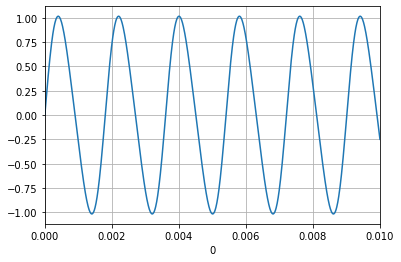

0.18447717538911523


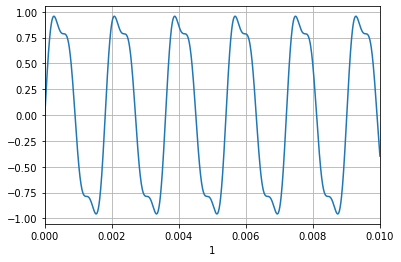

0.12195758905254361


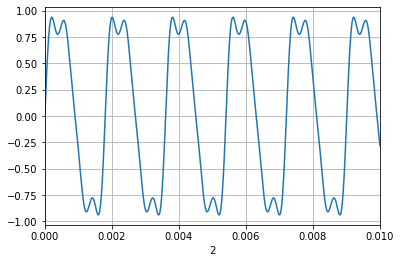

0.15966781573174554


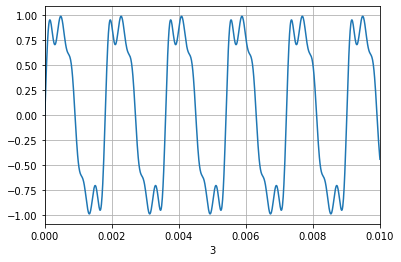

0.4827509662592709


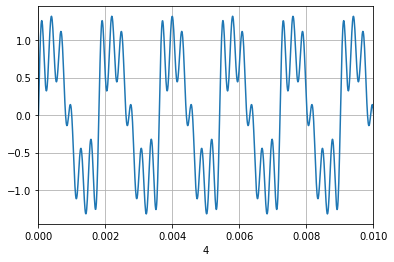

1.0


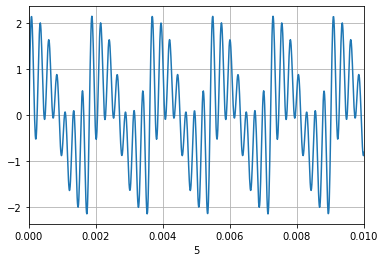

0.7071450955813224


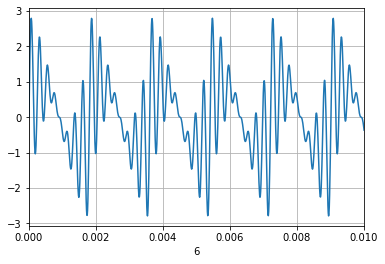

0.404653713569414


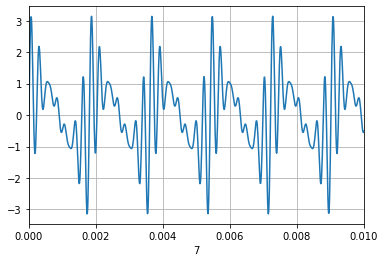

0.04647184790556774


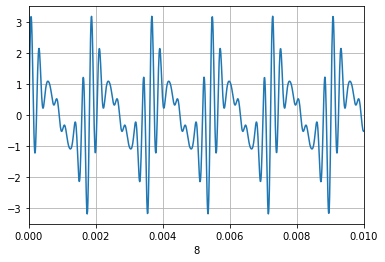

0.005575577144050977


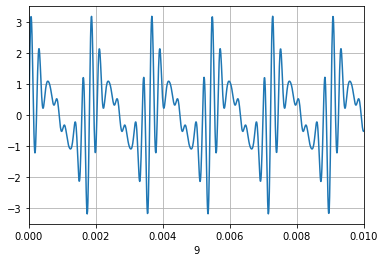

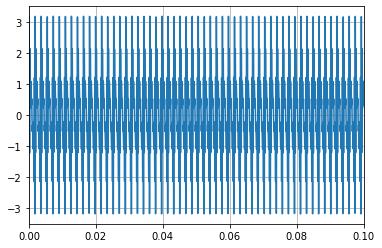

len=100000


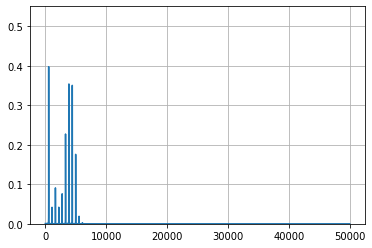

signal==== [0.         0.78406293 1.51866061 ... 0.94216697 0.89244345 0.83521108]
lensignal=== 100000
scale==== [    0  8072 15636 ...  9700  9188  8599]


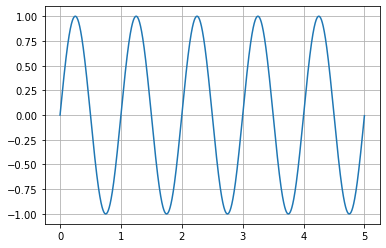

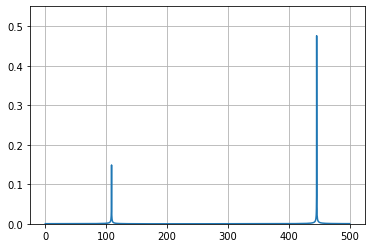

[ 0  2  4  6  8 10 12 14 16 18]
[1 1 2 1 3]
[1. 2. 3. 4. 5. 6.]


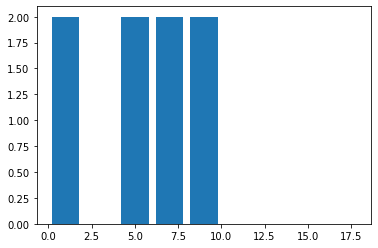

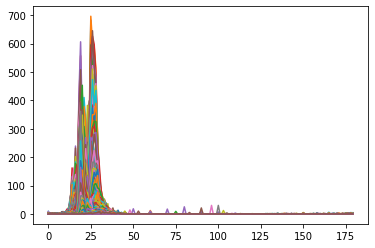

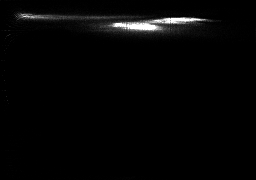

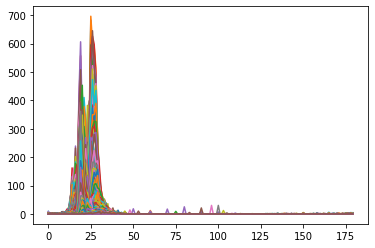

In [54]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import math
from scipy.io.wavfile import write

first_oct = 32.7032

img = cv2.imread('/dog2.PNG')

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
print(hsv.shape)
h,s,v = cv2.split(hsv)
print(h)
print("ssssssssssssssssssssssssss")
print(s)
print("vvvvvvvvvvvvvvvvvvvvvvvvvvv")
print(v)
hisH, bin = np.histogram(h, 12)
hisS, bin2 = np.histogram(s, 10)
hisV, bin3 = np.histogram(v, 7)
print("hhhhbibibibibibbin-")
print(hisH)
his_H = np.array(hisH)
hisH_max_index = np.argmax(his_H)
print(hisH_max_index)

his_S = np.array(hisS)
hisS_max_index = np.argmax(his_S)
print(hisS_max_index)
print("hisS")
print(hisS)
print(his_S/max(hisS))
his_S1 = his_S/max(hisS)

his_V = np.array(hisV)
hisV_max_index = np.argmax(his_V)
print(hisV_max_index)
print(hisV)

sound_oct = first_oct * 2 ** (hisV_max_index)
print("oct===",sound_oct)

f0 = sound_oct * 2 ** (hisH_max_index/12)
print("f0 =",f0)

fs = 10e4 
t = np.arange(0, 1, 1 / fs )
signal = np.sin(2 * np.pi * f0 * t)
for i in range (len(his_S1)):
  signal += his_S1[i] * np.sin(2* np.pi *(i+2)*f0*t)
  print(his_S1[i])
  plt.plot(t,signal)
  plt.xlabel(i)
  plt.xlim(0,0.01)
  plt.grid()
  plt.show()

plt.plot(t,signal)
plt.xlim(0, 0.1)
plt.grid()
plt.show()

length = len(signal)
print('len=',end='')
print(length)
fft = np.fft.fft(signal) / length
fft = fft[range(math.trunc(length/2))]
fft_magnitude = abs(fft) 

f = np.arange(length) * fs/length 
f = f[range(math.trunc(length/2))]
#print("f=",f) 

#plt.stem(f, np.fft.fftshift(fft_magnitude)) 
plt.plot(f, fft_magnitude)
plt.ylim(0,0.55)                                                                                     
plt.grid()                                                                                  
plt.show()    

print("signal====",signal)
print("lensignal===", len(signal))

#tttsignal = signal[range(math.trunc(length/5))]
#print("tttsignal===", tttsignal)
#print("tttlen===",len(tttsignal))
scaled = np.int16(signal/np.max(np.abs(signal)) * 32767)
#scaled = np.int16(tttsignal/np.max(np.abs(tttsignal)) * 32767)
print("scale====",scaled)
#length = math.trunc(length/5)
# 이게 write method에 사인파가 통으로 들어간다.
# 똑같은 파형도 0~1 넣을때랑 0~5 랑 다른 sound로 나오는데
# 0~5 를 0~1로 잘라서 write에 넣으면 똑같은 sound로 들린다.
# 0~1로 잘라서 넣을때는 write에 sample rate(=length=signal size) 도 0~1로 잘라야한다
# 자를때 trunc 써서 에러안나게 
write('dog2_10e4_01_tttsignal.wav', length, scaled)

#----------------------------------------------------------------------------------
fs = 1000
t = np.arange(0, 5, 1 / fs ) # 사이즈 5000의 signal 이 되는것
signal_test = np.sin(2 * np.pi * f0 * t) + 0.366 * np.sin(4 * np.pi * f0 * t)
fft_test = np.fft.fft(signal_test) / len(signal_test) ## 우리는 지금 푸리에 변환한 y값만 갖고있는거지
n=len(signal_test)
NFFT=n
fft_test = fft_test[range(math.trunc(NFFT/2))] # 2500보다 큰 범위들의 y값을 날리는거고
fft_test_mag = abs(fft_test)
f_test = np.linspace(-500, 500, length)  
frequency = np.fft.fftfreq(len(signal_test), 0.01) # 첫번째 신호길이 두번째 타임스텝
## fft.fftfreq 보는중 --> 그 푸리에변환하면 x축 간격 역수되는 그부분잡아주는거같은데
## 사인파 만들 때 샘플링수 적으면 안되는 듯 주의 
n=len(signal_test)        # Length of signal
NFFT=n      # ?? NFFT=2^nextpow2(length(y))  ??
k=np.arange(NFFT)
f_t=k*fs/NFFT    # double sides frequency range # 1000hz의 범위로 5000개 사이즈로 있는거
# 푸리에 변환 그래프를 보기위한 x값을 만든거고(y값만 갖고있었으니까)
# 그 x값 만들때 size는 당연히 일치하게끔 만드는거지 (아니면 에러뜸)
f_t=f_t[range(math.trunc(NFFT/2))]  # 2500보다 큰 범위들의 x값을 날리는거
# x y중 한쪽만 날리면 매칭안돼서 에러뜸 둘다날려야함(둘다 사이즈 맞춰야하고)

#t = t[range(math.trunc(2500))]
one = np.sin(2 * np.pi * 1 * t)
#one = one[range(math.trunc(2500))]
plt.plot(t, one)
plt.grid()
plt.show()

plt.plot(f_t, fft_test_mag) 
plt.ylim(0,0.55)                                                                                     
plt.grid()                                                                                  
plt.show() 



a = np.array([[1, 2,4],[2, 4, 2]], dtype=np.float64)
print(np.arange(0,20,2))
c , d = np.histogram([[1,4,5,6],[2,3,3,5]],5)
print(c)
print(d)
plt.hist([1,1,5,5,6,6,8,8], np.arange(0, 20, 2), rwidth=0.8)
plt.show()

hist, xbins, ybins = np.histogram2d(h.ravel(),s.ravel(),[180,256],[[0,180],[0,256]])
plt.plot(hist)
plt.show()

histr = cv2.calcHist([hsv],[0,1],None,[180,256],[0,180,0,256])
cv2_imshow(histr)
plt.plot(histr)
plt.show()

In [ ]:
import numpy as np
import cv2

color = [255, 0, 0] # 파란색
pixel = np.uint8([[color]]) # 한픽셀로 구성된 이미지로 변환

hsv1 = cv2.cvtColor(pixel, cv2.COLOR_BGR2HSV) 
# cvtColor 함수를 이용하여 hsv 색공간으로 변환

hsv = hsv1[0][0] # 픽셀값을 가져옴
h,s,v = cv2.split(hsv1)

print("H",h)
print("S",s)
print("v", v)
print("bgr: ", color)
print("hsv: ", hsv) # +_ 10

H [[120]]
S [[255]]
v [[255]]
bgr:  [255, 0, 0]
hsv:  [120 255 255]
